In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math as m
from scipy.optimize import curve_fit
from scipy.integrate import quad
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
file=open('caracterizacion.txt', 'r')
text=file.read()
file.close()
print(len(text))

48153


In [3]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("caracterizacion.txt", delim_whitespace=True, header=None)

# Convierte a arreglos de numpy o listas
x = df[0].values
y = df[1].values

C:\Users\joarr\AppData\Local\Temp\ipykernel_4832\2382428221.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("caracterizacion.txt", delim_whitespace=True, header=None)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3013 non-null   float64
 1   1       3013 non-null   float64
dtypes: float64(2)
memory usage: 47.2 KB


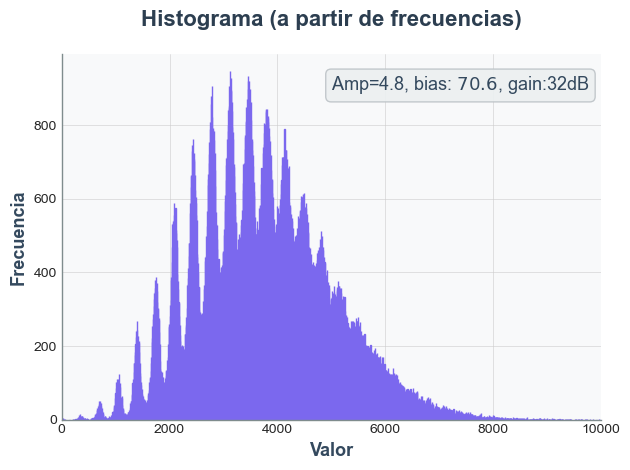

In [5]:
 # Estilo
plt.style.use('seaborn-v0_8-whitegrid')
background_color = '#f8f9fa'
plt.gca().set_facecolor(background_color)

# Anotación LaTeX
ecuacion = r"Amp=4.8, bias: $70.6$, gain:32dB"
plt.annotate(ecuacion, xy=(0.5, 0.9), xycoords='axes fraction',
            fontsize=13, color="#34495e",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))

plt.bar(x, y, width=0.8, edgecolor="mediumslateblue")
plt.xlabel('Valor', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel('Frecuencia', fontsize=13, fontweight='bold', color="#34495e")
plt.xlim(-1,10000)
plt.title('Histograma (a partir de frecuencias)',fontsize=16, fontweight='bold', pad=20, color="#2c3e50")


  # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

  # Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)
plt.tight_layout()
plt.show()

# DATOS DIA: 30/10/2025

gate: 552 ns
pregate:88 ns
bias:70.6
gain: 32dB
amplitud:

-- 4.3 -------->12 picos
-- 4.4 -------->13 picos
-- 4.5 -------->16 picos REAL


In [6]:
def gaussian(x,A,mu,sigma):
    return A*np.exp(-((x-mu)**2)/(2*sigma**2))

In [7]:
file=open('Datos real no fake_histo.txt', 'r')
text=file.read()
file.close()
print(len(text))

48485


In [8]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Datos real no fake_histo.txt", delim_whitespace=True, header=None)

# Convierte a arreglos de numpy o listas
x1 = df[0].values
y1 = df[1].values

C:\Users\joarr\AppData\Local\Temp\ipykernel_4832\740121645.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Datos real no fake_histo.txt", delim_whitespace=True, header=None)


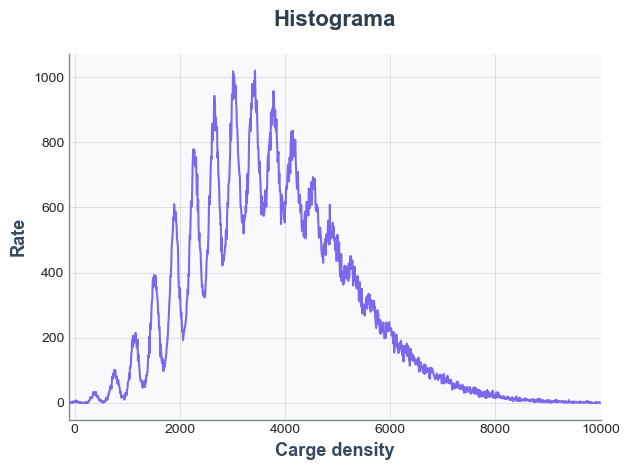

In [9]:
 # Estilo
plt.style.use('seaborn-v0_8-whitegrid')
background_color = '#f8f9fa'
plt.gca().set_facecolor(background_color)

# Anotación LaTeX
#ecuacion = r"Amp=4.5, bias: $70.5$, gain:32dB"
#plt.annotate(ecuacion, xy=(0.5, 0.9), xycoords='axes fraction',
#            fontsize=13, color="#34495e",
#            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
 #           edgecolor="#bdc3c7", alpha=0.9))
#, width=0.8
plt.plot(x1, y1,color="mediumslateblue")
plt.xlabel('Carge density', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel('Rate', fontsize=13, fontweight='bold', color="#34495e")
plt.xlim(-100,10000)

plt.title('Histograma',fontsize=16, fontweight='bold', pad=20, color="#2c3e50")


  # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

  # Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)
plt.tight_layout()
plt.show()

In [10]:
X=[]
for i in range(len(x1)):
    aux=[x1[i],y1[i]]
#    X=np.vstack([aux])
    X.append(aux)
X=np.array(X)

In [11]:
y1 = y1.reshape(-1, 1)
#x1=x1.reshape(-1, 1)

In [12]:
# Ajustar GMM
gmm = GaussianMixture(n_components=16, random_state=42)
labels = gmm.fit_predict(y1[114:1320])
gmm.means_

array([[690.05510793],
       [ 80.14922811],
       [384.72456809],
       [  7.26527928],
       [838.79545176],
       [571.95885874],
       [179.59728721],
       [303.64813018],
       [488.73975784],
       [975.61334267],
       [763.56175361],
       [617.71752879],
       [226.80530678],
       [ 34.66720456],
       [130.94621018],
       [921.14553001]])

In [13]:
# Extraer parámetros de cada gaussiana
print("Parámetros de cada componente:")
for i in range(15):
    media = gmm.means_[i][0]
    desv = np.sqrt(gmm.covariances_[i][0][0])
    peso = gmm.weights_[i]
    print(f"Gaussiana {i+1}: μ={media:.2f}, σ={desv:.2f}, peso={peso:.2%}")


Parámetros de cada componente:
Gaussiana 1: μ=690.06, σ=26.03, peso=3.85%
Gaussiana 2: μ=80.15, σ=16.85, peso=8.56%
Gaussiana 3: μ=384.72, σ=31.97, peso=6.40%
Gaussiana 4: μ=7.27, σ=5.51, peso=21.44%
Gaussiana 5: μ=838.80, σ=22.56, peso=2.72%
Gaussiana 6: μ=571.96, σ=29.80, peso=4.93%
Gaussiana 7: μ=179.60, σ=17.45, peso=3.87%
Gaussiana 8: μ=303.65, σ=25.98, peso=5.30%
Gaussiana 9: μ=488.74, σ=35.20, peso=6.94%
Gaussiana 10: μ=975.61, σ=29.81, peso=0.99%
Gaussiana 11: μ=763.56, σ=27.35, peso=3.47%
Gaussiana 12: μ=617.72, σ=30.24, peso=4.83%
Gaussiana 13: μ=226.81, σ=17.84, peso=5.01%
Gaussiana 14: μ=34.67, σ=15.19, peso=13.79%
Gaussiana 15: μ=130.95, σ=19.38, peso=5.72%


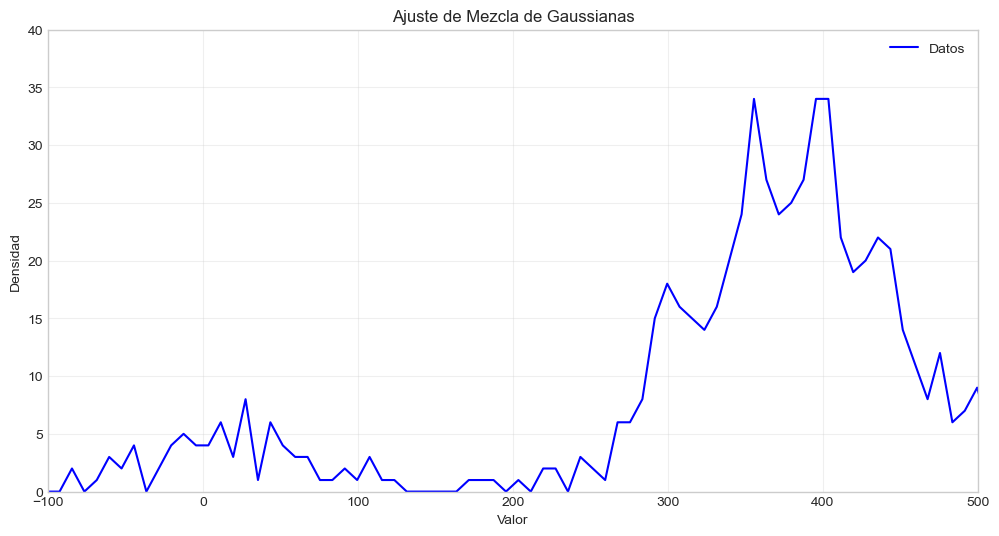

In [40]:
# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(x1,y1,color='blue', label='Datos')

# Graficar cada gaussiana individual
x = np.linspace(y1.min(), y1.max(), 48485)
for i in range(14):
    mu = gmm.means_[i][0]
    sigma = np.sqrt(gmm.covariances_[i][0][0])
    peso = gmm.weights_[i]
   # plt.plot(x, peso * norm.pdf(x, mu, sigma), '--', 
           #  label=f'Componente {i+1}', linewidth=2)

plt.xlabel('Valor')
plt.xlim(-100,500)
plt.ylim(0,40)
plt.ylabel('Densidad')
plt.legend()
plt.title('Ajuste de Mezcla de Gaussianas')
plt.grid(True, alpha=0.3)
plt.show()

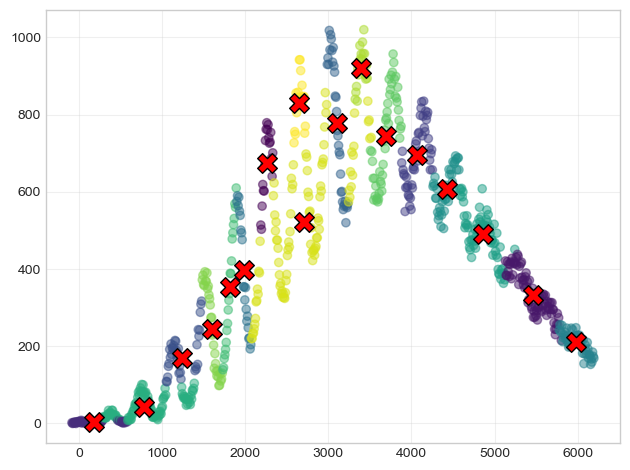

In [15]:

# Probar diferentes n_components


gmm = GaussianMixture(n_components=17, random_state=42)
labels = gmm.fit_predict(X[114:900,:900])
    
plt.scatter(X[114:900, 0], X[114:900, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], 
             marker='X', s=200, c='red', edgecolors='black')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# CURVE FIT



In [16]:
df = pd.read_csv("Datos real no fake_histo.txt", sep='\t', header=None, names=['valor', 'frecuencia'])

In [17]:
def gaussiana(x,A,mu,sigma):
    return A*np.exp(-((x-mu)**2)/(2*sigma**2))

In [18]:
intervalos = [
    (-68, 145), (270, 470), (680, 850), (1100, 1240), (1400, 1680),
    (1700, 1995), (2130, 2400), (2550, 2750), (2900, 3150),
    (3325, 3500), (3690, 3835), (4050, 4195), (4438, 4590),
    (4795, 4950), (5175, 5333), (5520, 5680)
] 

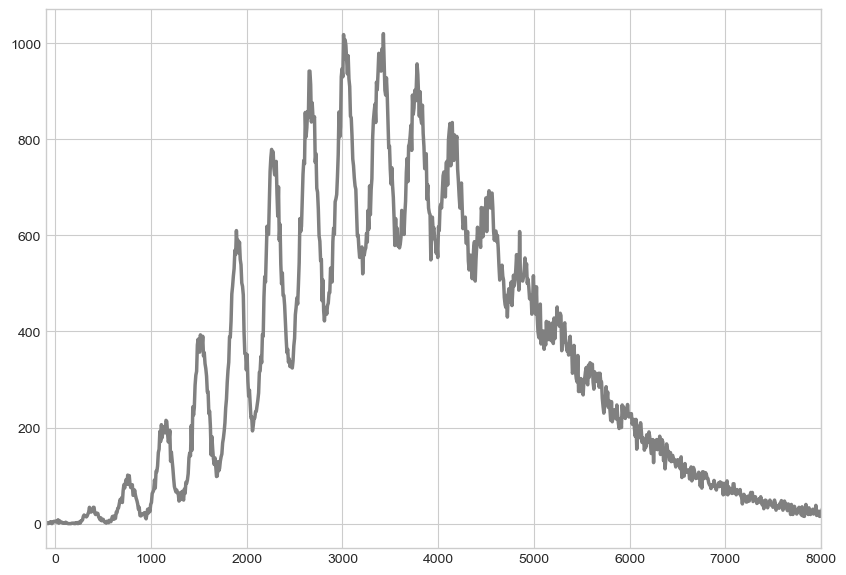

In [19]:
resultados = []
ince_mu=[]
ince_var=[]
incert_var=[]

for inicio, fin in intervalos:
    datos = df[(df['valor'] >= inicio) & (df['valor'] <= fin)]
    
    idx_max = datos['frecuencia'].idxmax()
    mu_init = datos.loc[idx_max, 'valor']
    A_init = datos.loc[idx_max, 'frecuencia']
    sigma_init = (fin - inicio) / 4
    
    params, pcov= curve_fit(
        gaussiana,
        datos['valor'].values,
        datos['frecuencia'].values,
        p0=[A_init, mu_init, sigma_init],
        bounds=([0, inicio, 10], [np.inf, fin, fin-inicio])
    )
    resultados.append(params)
    ince_mu.append(np.sqrt(pcov[1][1]))
    ince_var.append(np.sqrt(pcov[2][2])/2)
    incert_var.append(pcov[2][2])
plt.figure(figsize=(10, 7))
plt.xlim(-100,8000)
plt.plot(df['valor'], df['frecuencia'], 'gray', linewidth=2.5, label='Datos Originales')

In [20]:
Integral=np.zeros_like(intervalos)
for i in range(len(Integral)):
    params=resultados[i]
    A,mu,sigma=params[0], params[1],params[2]
    Integral[i]=quad(gaussiana, intervalos[i][0],  intervalos[i][1], args=(A,mu,sigma) )

In [21]:
Integral
I=np.zeros(len(Integral))
for j in range(len(Integral)):
    I[j]=Integral[j][0]
len(I)   

16

In [22]:
ince_var,ince_mu

([4.298495341757869,
  2.376393376418517,
  2.583639239721773,
  4.166195850705122,
  1.077101966366195,
  0.9348163389670874,
  1.211851207640666,
  2.1050598520407613,
  1.5027574885429533,
  3.2732390611592805,
  8.176206232631106,
  12.303805283337779,
  11.320389330480342,
  13.629046328611226,
  13.775869484917154,
  14.402348565237013],
 [7.7177030101364865,
  3.821821179773921,
  3.1701906836657923,
  6.06333905205934,
  1.7446009403763323,
  1.6385119653964968,
  1.6874761475811693,
  2.0355361749332572,
  1.6262276264810271,
  2.48607142036962,
  5.461549822610981,
  8.97189632797758,
  6.19409435950508,
  7.388078389266961,
  7.258206827814946,
  7.547100480980186])

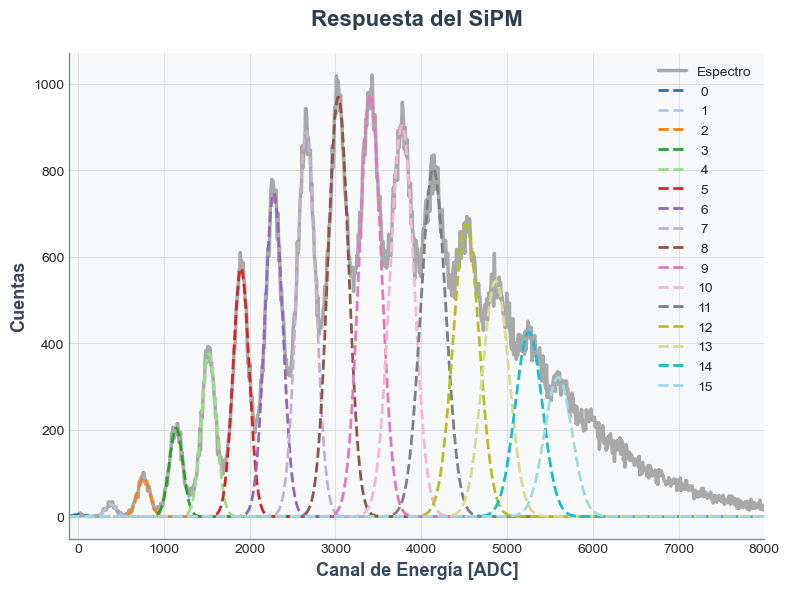

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(df['valor'], df['frecuencia'], 'darkgray', linewidth=2.5, label='Espectro')

x = np.linspace(-100, 10000, 2000)
colors = plt.cm.tab20(np.linspace(0, 1, len(resultados)))

for i, params in enumerate(resultados):
    y = gaussiana(x, *params)
    plt.plot(x, y, '--', linewidth=2, color=colors[i], label=r"%2.f" %i)

# Estilo
plt.style.use('seaborn-v0_8-whitegrid')
background_color = '#f8f9fa'
plt.gca().set_facecolor(background_color)


 # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

plt.xlim(-100,8000)
#plt.ylim(0,50)
#plt.ylim(bottom=0)

# Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)

plt.xlabel('Canal de Energía [ADC]', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel('Cuentas', fontsize=13, fontweight='bold', color="#34495e")
plt.title("Respuesta del SiPM",fontsize=16, fontweight='bold', pad=20, color="#2c3e50")

plt.tight_layout()
plt.legend(loc="best")
plt.show()

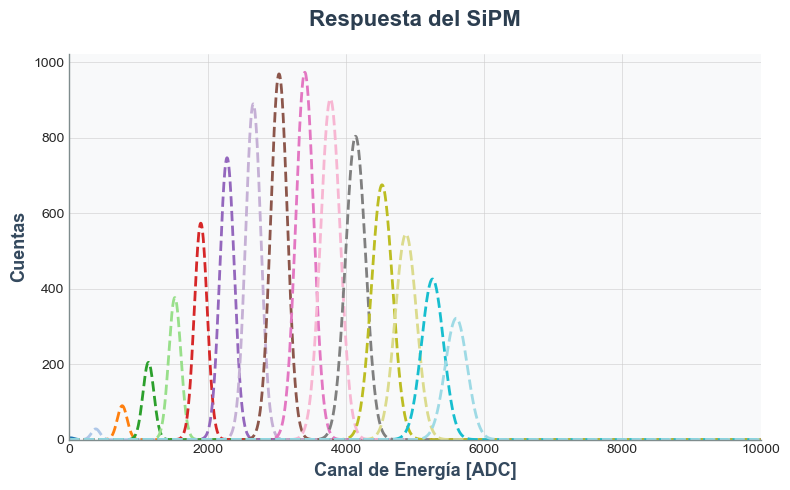

In [24]:
plt.figure(figsize=(8, 5))
# Estilo
plt.style.use('seaborn-v0_8-whitegrid')
background_color = '#f8f9fa'
plt.gca().set_facecolor(background_color)


 # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

for i, params in enumerate(resultados):
    y = gaussiana(x, *params)
    plt.plot(x, y, '--', linewidth=2, color=colors[i])

plt.xlim(0, 10000)
plt.ylim(bottom=0)
# Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)

plt.xlabel('Canal de Energía [ADC]', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel('Cuentas', fontsize=13, fontweight='bold', color="#34495e")
plt.title("Respuesta del SiPM",fontsize=16, fontweight='bold', pad=20, color="#2c3e50")

plt.tight_layout()
#plt.legend(loc="best")
plt.show()

# Densidad de probabilidad

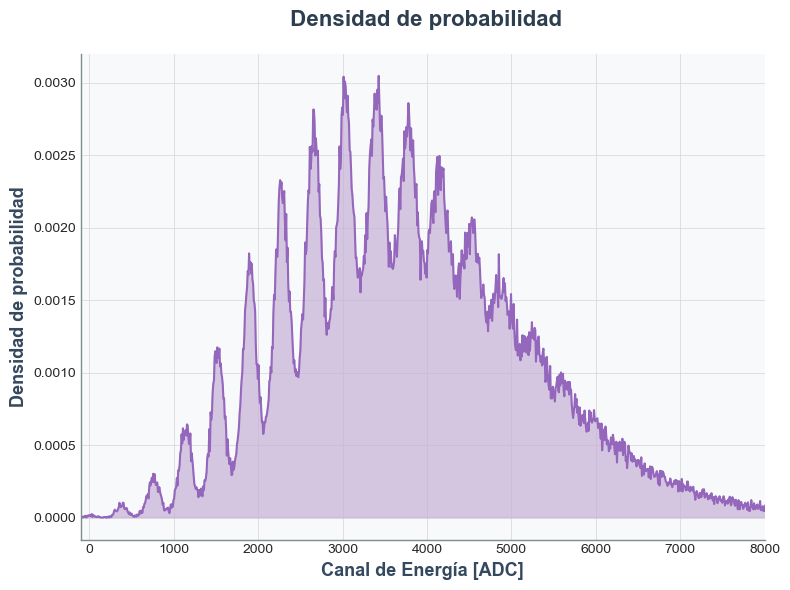

In [25]:
plt.figure(figsize=(8, 6))
pdf= (df['frecuencia'])/ np.sum(df['frecuencia'])
plt.plot(df["valor"],pdf, color=colors[6])
plt.fill_between(df["valor"],pdf, color=colors[7], alpha=0.7)

# Estilo
plt.style.use('seaborn-v0_8-whitegrid')
background_color = '#f8f9fa'
plt.gca().set_facecolor(background_color)

 # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

plt.xlim(-100,8000)


# Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.xlabel('Canal de Energía [ADC]', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel('Densidad de probabilidad', fontsize=13, fontweight='bold', color="#34495e")
plt.title(" Densidad de probabilidad",fontsize=16, fontweight='bold', pad=20, color="#2c3e50")

plt.tight_layout()
plt.show()

In [26]:
def PdResolucion(X0,X1,sig0,sig1):
    delta_pp= np.abs(X1-X0)

    gain=np.sqrt((sig1**2)-(sig0**2))
    R=(delta_pp)/(gain)
    return R,gain
    
def lineal(x,m,b):
    return m*x + b
# INCERTIDUMBRES DEL PODER DE RESOLUCIÓN




In [27]:
Gain=np.zeros(len(resultados)-1)
g=np.zeros(len(resultados)-1)
incer_mu=np.zeros(len(resultados)-1)
incer_gain=np.zeros(len(resultados)-1)
incer_poder=np.zeros(len(resultados)-1)

for i in range(len(resultados)-1):
    X0=resultados[i][1]
    X1=resultados[i+1][1]
    sig0=resultados[i][2]
    sig1=resultados[i+1][2]
    
    Gain[i],g[i]=PdResolucion(X0,X1,sig0,sig1)
    incer_mu[i]=np.sqrt(ince_mu[i]**2 + ince_mu[i+1]**2)
    incer_gain[i]=np.sqrt( ((ince_var[i])*(sig0/g[i])**2)+((ince_var[i+1])*(sig1/g[i])**2)  )

    incer_poder[i]=np.sqrt( ( incer_mu[i]/g[i])**2 +(((X1-X0)/(g[i])**2)*incer_gain[i])**2 )
    
mean_P = np.mean(Gain)   # promedio a lo largo de simulaciones
std_P  = np.std(Gain)    # desviación estándar

In [28]:
incer_poder, Gain

(array([ 1.30893405,  1.45558861,  1.88256175,  1.48958353,  1.41444434,
         0.51010385,  1.28541013,  0.816229  ,  0.9890447 ,  0.88226987,
        10.38662359,  2.92480942,  9.48548466, 10.98765714, 18.03601323]),
 array([10.55159681, 11.22449136, 11.07480245, 10.51908836, 11.60524157,
         7.95065853,  9.75775328,  8.01986429,  7.90746904,  6.3461329 ,
        12.83702739,  8.40227036, 11.37689257, 12.58619065, 13.58499121]))

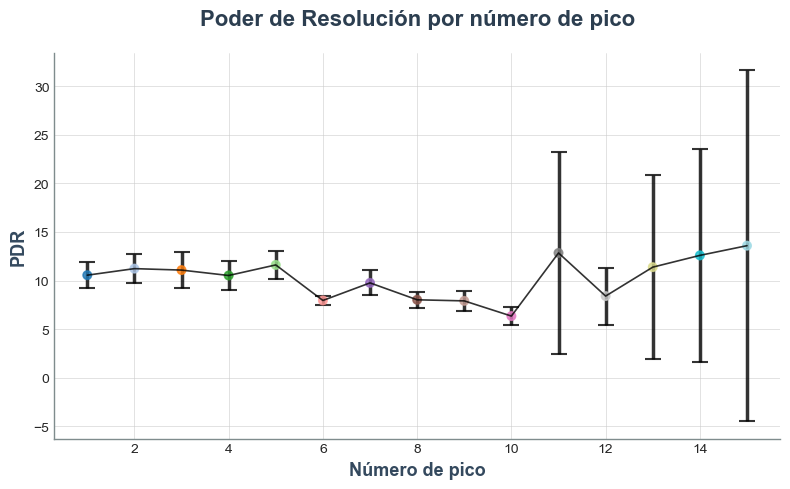

In [29]:
colors2 = plt.cm.tab20(np.linspace(0, 1, len(Gain)))

plt.figure(figsize=(8, 5))
picos=np.linspace(1,15,15)

# Crear gráfico
plt.errorbar(picos,Gain, yerr=incer_poder, fmt="none",
                 ecolor= "Black", elinewidth=2.5,
                 capsize=6, capthick=1.5, alpha=0.8,
                 zorder=1)

plt.scatter(picos,Gain , color=colors2, linewidth=1.2,alpha=0.8)
plt.plot(picos,Gain , color="black", linewidth=1.2,alpha=0.8)
#plt.fill_between(picos, Gain+incer_mu, Gain-incer_mu, color="plum", alpha=0.25)  

plt.xlabel('Número de pico', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel("PDR", fontsize=13, fontweight='bold', color="#34495e")
plt.title("Poder de Resolución por número de pico",fontsize=16, fontweight='bold', pad=20, color="#2c3e50")

  # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

  # Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)
#plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [30]:
varianza=np.zeros(len(resultados))
incertidum_var=np.zeros(len(resultados))
for i in range(len(resultados)):
    varianza[i]=resultados[i][2]**2
    incertidum_var[i]=np.sqrt(((ince_var[i])*2*resultados[i][2])**2)

Picos=np.linspace(0,15,16)

In [31]:
popt, pcov_lineal= curve_fit(lineal,Picos ,varianza,p0=[1, 10] )
popt

array([1687.51928704, 1594.48577827])

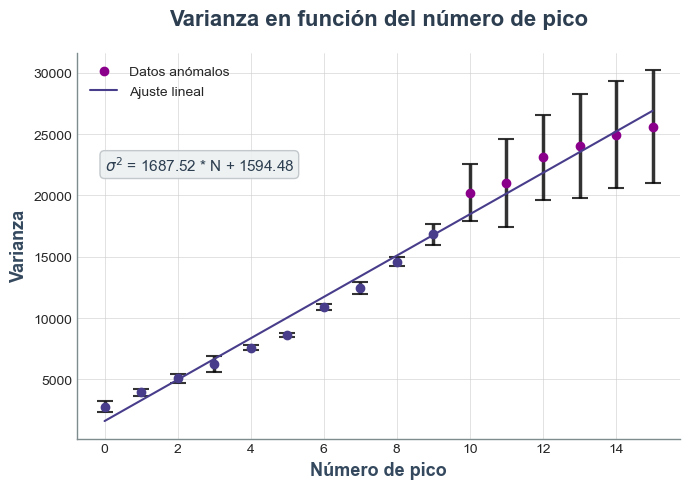

In [32]:
plt.figure(figsize=(7, 5))

plt.errorbar(Picos,varianza, yerr=incertidum_var, fmt="none",
                 ecolor= "Black", elinewidth=2.5,
                 capsize=6, capthick=1.5, alpha=0.8,
                 zorder=1)

plt.scatter(Picos[0:10],varianza[0:10], color="Darkslateblue")
plt.scatter(Picos[10:16],varianza[10:16], color="Darkmagenta", label="Datos anómalos")
plt.plot(Picos, lineal(Picos,popt[0],popt[1]), color="Darkslateblue", label="Ajuste lineal")
plt.xlabel('Número de pico', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel("Varianza", fontsize=13, fontweight='bold', color="#34495e")
plt.title("Varianza en función del número de pico",fontsize=16, fontweight='bold', pad=20, color="#2c3e50")

plt.annotate(r"$\sigma^2$ = %.2f * N + 1594.48" %popt[0] , xy=(0, 22e3),
            fontsize=11, color="#2c3e50",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))


  # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

  # Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


# COMPARACIÓN GAUSSIANA CON POISSON 

In [33]:
from scipy.special import factorial

def poisson(x, mu):
    return np.exp(-mu) * mu**x / factorial(x)

In [34]:
popt, pcov= curve_fit( poisson,Picos[4:],I[4:], p0=[2])
mu_fit = popt[0]

popt2, pcov2= curve_fit( gaussian,Picos,I, p0=[3,5,4])
A_fit,mu_fit2,sigma2 = popt2[0], popt2[1],popt2[2]

mu_fit

8.070552455256271

C:\Users\joarr\AppData\Local\Temp\ipykernel_4832\3427008085.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, poisson(x_fit, mu_fit)* np.sum(I), 'r-', label='Ajuste Poissoniano', color="plum")


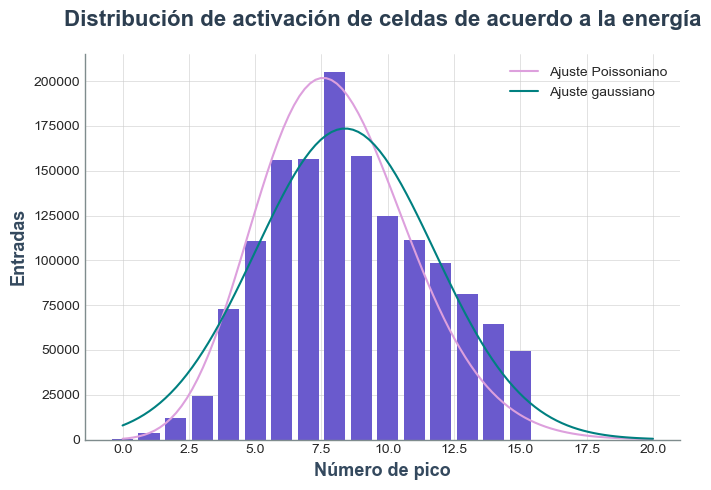

In [35]:
plt.figure(figsize=(7, 5))
x_fit = np.linspace(min(Picos),20,100)

plt.bar(Picos,I, color="slateblue")
plt.plot(x_fit, poisson(x_fit, mu_fit)* np.sum(I), 'r-', label='Ajuste Poissoniano', color="plum")
plt.plot(x_fit, gaussian(x_fit,A_fit, mu_fit2,sigma2), color="teal", label='Ajuste gaussiano')
plt.xlabel('Número de pico', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel("Entradas", fontsize=13, fontweight='bold', color="#34495e")
plt.title("Distribución de activación de celdas de acuerdo a la energía",fontsize=16, fontweight='bold', pad=20, color="#2c3e50")

  # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

  # Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [36]:
Picos,poisson(Picos,params[0])

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 array([2.33833855e-140, 7.51805010e-138, 1.20857344e-135, 1.29523811e-133,
        1.04108802e-131, 6.69445566e-130, 3.58725165e-128, 1.64763735e-126,
        6.62169949e-125, 2.36550997e-123, 7.60540959e-122, 2.22294004e-120,
        5.95585790e-119, 1.47298661e-117, 3.38273977e-116, 7.25062018e-115]))